In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load train and test files as dataframes

In [2]:
train_df = pd.read_csv('train.csv', header=0, parse_dates=[2],index_col=2)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB


In [4]:
train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [5]:
train_df.tail()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2012-09-28,45,98,508.37,False
2012-10-05,45,98,628.10,False
2012-10-12,45,98,1061.02,False
2012-10-19,45,98,760.01,False
2012-10-26,45,98,1076.80,False


In [6]:
test_df = pd.read_csv('test.csv', header=0, parse_dates=[2],index_col=2)

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115064 entries, 2012-11-02 to 2013-07-26
Data columns (total 3 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
IsHoliday    115064 non-null bool
dtypes: bool(1), int64(2)
memory usage: 2.7 MB


In [8]:
test_df.head()

,Store,Dept,IsHoliday
Date,,,
2012-11-02,1,1,False
2012-11-09,1,1,False
2012-11-16,1,1,False
2012-11-23,1,1,True
2012-11-30,1,1,False


### Load the features and Stores files as dataframes

In [9]:
features_df = pd.read_csv('features.csv', header=0, parse_dates=[1],index_col=1)

In [10]:
features_df.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2010-02-05 to 2013-07-26
Data columns (total 11 columns):
Store           8190 non-null int64
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1)
memory usage: 711.8 KB


In [12]:
stores_df = pd.read_csv('stores.csv')

In [13]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [14]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


### EDA

Text(0,0.5,'Count')

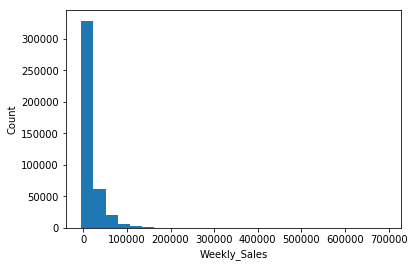

In [18]:
## EDA:
_ = plt.hist(train_df['Weekly_Sales'],bins=25)
plt.xlabel('Weekly_Sales')
plt.ylabel('Count')

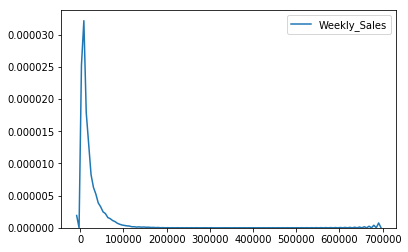

In [15]:
sns.kdeplot(train_df['Weekly_Sales'])

In [19]:
def log_transform_WeeklySales(col):
    Weekly_Sales = col[0]
    
    if Weekly_Sales <= 0:
        return 0
    else:
        return np.log(Weekly_Sales)

In [20]:
#Log transform Weekly sales
train_df['Log_WeeklySales'] = train_df[['Weekly_Sales']].apply(log_transform_WeeklySales,axis=1)

Text(0,0.5,'Count')

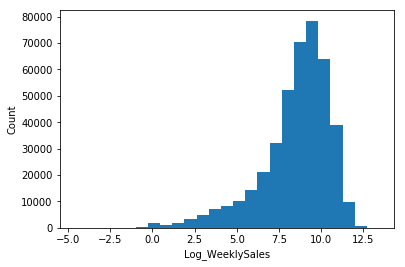

In [21]:
_ = plt.hist(train_df['Log_WeeklySales'],bins=25)
plt.xlabel('Log_WeeklySales')
plt.ylabel('Count')

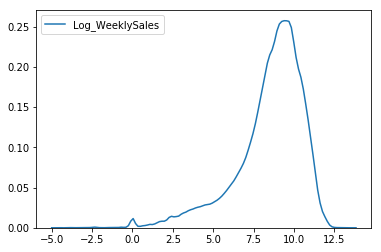

In [22]:
sns.kdeplot(train_df['Log_WeeklySales'])

In [23]:
## This shows that data is symmetric but however, the mean is not 0. The data is not normal.

In [ ]:
##************Question: Should the below be used to normalize/standarize data?***********

In [36]:
from sklearn import preprocessing

# separate the data from the target attributes
X = train_df.drop(['Weekly_Sales','Log_WeeklySales'],axis=1)
y = train_df['Log_WeeklySales']


In [39]:
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [40]:
normalized_X

array([[ 0.70710678,  0.70710678,  0.        ],
       [ 0.57735027,  0.57735027,  0.57735027],
       [ 0.70710678,  0.70710678,  0.        ],
       ..., 
       [ 0.41729322,  0.9087719 ,  0.        ],
       [ 0.41729322,  0.9087719 ,  0.        ],
       [ 0.41729322,  0.9087719 ,  0.        ]])

In [41]:
#standardize the data attributes
standardized_X = preprocessing.scale(X)

In [42]:
standardized_X

array([[-1.65819926, -1.41874236, -0.27510614],
       [-1.65819926, -1.41874236,  3.63496074],
       [-1.65819926, -1.41874236, -0.27510614],
       ..., 
       [ 1.78325781,  1.76241805, -0.27510614],
       [ 1.78325781,  1.76241805, -0.27510614],
       [ 1.78325781,  1.76241805, -0.27510614]])

In [43]:
# 1. Is the Weekly_Sales data normal?
# If not, how do we make it normal?

# 2. Is there a significant difference between sales during holidays and non-holidays?
# What is the Null and Alternate hypothesis?

# 3. What is the margin of error, CI, p-value?